# Đồ án cuối kỳ môn Lập trình cho KHDL - CSC17104_21KHDL1

---
## 1. Thông tin nhóm: Nhóm 12

- Thành viên:
    - Nguyễn Trọng Đại - 21127587
    - Nguyễn Tấn Khiêm - 21127726

---
## 2. Import thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

---
## 3. Thu thập dữ liệu

- Bộ dữ liệu [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset) bao gồm 400 hàng và 13 cột, bao gồm nhiều biến số liên quan đến giấc ngủ và thói quen hàng ngày. Nó bao gồm các chi tiết như giới tính, tuổi tác, nghề nghiệp, thời gian ngủ, chất lượng giấc ngủ, mức độ hoạt động thể chất, mức độ căng thẳng, chỉ số BMI, huyết áp, nhịp tim, số bước đi hàng ngày và sự hiện diện hay vắng mặt của rối loạn giấc ngủ.
- Các tính năng chính của Tập dữ liệu:
    + Số liệu toàn diện về giấc ngủ: Khám phá thời lượng, chất lượng giấc ngủ và các yếu tố ảnh hưởng đến kiểu ngủ. 
    + Các yếu tố về lối sống: Phân tích mức độ hoạt động thể chất, mức độ căng thẳng và chỉ số BMI. 
    + Sức khỏe tim mạch: Kiểm tra huyết áp và đo nhịp tim. 
    + Phân tích rối loạn giấc ngủ: Xác định sự xuất hiện của các rối loạn giấc ngủ như Mất ngủ và Ngưng thở khi ngủ.
- Tác giả: [Laksika Tharmalingam](https://www.kaggle.com/uom190346a) (Owner).
- License: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) nguồn này là public và no copyright vì vậy nhóm em có thể sao chép, khai thác, sửa đổi và phân phối.
- Ý nghĩa các cột của Dataset:
    - Personal ID: Một định danh cho mỗi cá nhân.
    - Gender: Giới tính của người đó (Male/Female).
    - Age: Tuổi của người đó tính bằng năm.
    - Occupation: Nghề nghiệp hoặc ngành nghề của người đó.
    - Sleep Duration (giờ): Số giờ ngủ của người đó mỗi ngày.
    - Quality of Sleep (thang điểm: 1-10): Đánh giá chủ quan về chất lượng giấc ngủ, có giá trị từ 1 đến 10.
    - Physical Activity Level (phút/ngày): Số phút mà người đó tham gia hoạt động vận động hàng ngày.
    - Stress Level (thang điểm: 1-10): Đánh giá chủ quan về mức độ stress mà người đó trải qua, có giá trị từ 1 đến 10.
    - BMI Category: Phân loại BMI của người đó (ví dụ: Gầy, Bình thường, Thừa cân).
    - Blood Pressure (systolic/diastolic): Đo lường huyết áp của người đó, thường được biểu thị dưới dạng áp systolic trên áp diastolic.
    - Heart Rate (nhịp/phút): Nhịp tim nghỉ của người đó tính bằng nhịp mỗi phút.
    - Daily Steps: Số bước chân mà người đó đi mỗi ngày.
    - Sleep Disorder: Sự có mặt hoặc vắng mặt của rối loạn ngủ ở người đó (Không, Mất ngủ, Ngưng thở khi ngủ).
    - Chi tiết về Cột Sleep Disorder:
        + None: Người đó không có bất kỳ rối loạn ngủ cụ thể nào.
        + Insomnia: Người đó gặp khó khăn khi ngủ hoặc giữ giấc ngủ, dẫn đến giấc ngủ không đủ hoặc chất lượng kém.
        + Sleep Apnea: Người đó gặp phải tình trạng tạm dừng hơi thở trong khi ngủ, dẫn đến việc làm gián đoạn mô hình giấc ngủ và có thể gây nguy cơ về sức khỏe.

---
## 4. Khám phá dữ liệu + Tiền xử lý

### 4.0. Đọc dữ liệu

In [2]:
# TODO: Đọc data từ file csv và lưu vào df. Hiển thị 5 dòng ngẫu nhiên
df = pd.read_csv("./data/Sleep_health_and_lifestyle_dataset.csv")
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
362,363,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
108,109,Male,37,Engineer,7.8,8,70,4,Normal Weight,120/80,68,7000,NaN
293,294,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
323,324,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN
301,302,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN


### 4.1. Số dòng, số cột

In [3]:
# TODO: Lưu số dòng vào số cột vào n_rows, n_cols
n_rows, n_cols = df.shape

n_rows, n_cols

(374, 13)

### 4.2. Khám phá dòng

- Nhận xét dòng: các dòng thể hiện khảo sát của một Person ID.

In [4]:
# TODO: Kiểm tra duplicate, lưu vào 'is_duplicated'
is_duplicated = df.duplicated().all()

print("Dữ liệu có duplicate? :", is_duplicated)

Dữ liệu có duplicate? : False


In [5]:
# TODO: Nếu có duplicate thì loại bỏ nó
df = df.drop_duplicates()

### 4.3. Khám phá cột

- Nhận xét cột: kiểu dữ liệu của các cột đều hợp lý.

In [6]:
# TODO: Liệt kê tên các cột và kiểu dữ liệu tương ứng

# Liệt kê tên các cột và kiểu dữ liệu
column_types = df.dtypes

# Hiển thị thông tin
print("Tên cột và kiểu dữ liệu:")
print(column_types)

Tên cột và kiểu dữ liệu:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


### 4.4. Loại bỏ các dòng và cột vô nghĩa

- **TODO**: Các dòng trong dataset đều là các khảo sát được thực hiện ở các cá nhân khác nhau nên đều có nghĩa.


In [7]:
# TODO: Loại bỏ các dòng vô nghĩa

- **TODO**: Cột Person ID là vô nghĩa do có thể thấy nó được sắp xếp theo thứ tự tăng dần, nên ta chỉ cần truy xuất vị trí index ta sẽ có được Person ID nếu cần.

In [8]:
# TODO: Loại bỏ các cột vô nghĩa
df = df.drop(columns=['Person ID'])
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### 4.5. Xử lý data thiếu và chuyển đổi kiểu dữ liệu

- Bảng tóm tắt của Dataframe:

In [9]:
# TODO: Hiển thị bảng tóm tắt của Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


- **Nhận xét:** Ngoài cột `Sleep Disorder` ra thì các cột còn lại không có dữ liệu thiếu. Sở dĩ cột `Sleep Disorder` tồn tại giá trị thiếu là vì tác giả sử dụng `None` để đánh dấu những người không bị rối loạn giấc ngủ (ngủ bình thường). `Pandas` nhận diện các ô `None` thành các ô bị trống, thực chất không phải vậy. Vì vậy, nhóm em sẽ chuyển các giá trị `None` thành `No` để phù hợp với `Pandas`.

In [10]:
# TODO: Xử lý các dòng bị thiếu
df['Sleep Disorder'].fillna('No', inplace=True)
df['Sleep Disorder'].value_counts()

Sleep Disorder
No             219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

- Đối với phần chuyển đổi kiểu dữ liệu, nhìn chung có vẻ tất cả đều đúng kiểu dữ liệu, nhưng nếu để ý thì cột `Blood Pressure` đang chứa cả giá trị của tâm thu và tâm trương (giá trị khi đo huyết áp) và có kiểu là `object`. Để thuận tiện cho việc xử lý sau này, nhóm em sẽ tách cột `Blood Pressure` thành 2 cột `Systolic`(tâm thu) và `Diastolic`(tâm trương) có kiểu là `int64`. Như vậy bộ dữ liệu sẽ có tổng cộng 9 cột `Numeric` và 4 cột `Categorical` (không tính cột `Person ID`).

In [11]:
# TODO: Chuyển đổi kiểu dữ liệu cho đúng
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.extract(r'(\d+)\/(\d+)')
df.drop('Blood Pressure', axis=1, inplace=True)
df.sample(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
124,Female,37,Accountant,7.2,8,60,4,Normal,68,7000,No,115,75
188,Female,43,Teacher,6.7,7,45,4,Overweight,65,6000,Insomnia,135,90
339,Female,55,Nurse,8.1,9,75,4,Overweight,72,5000,Sleep Apnea,140,95
155,Male,39,Lawyer,7.2,8,60,5,Normal,68,8000,No,130,85
74,Male,33,Doctor,6.0,6,30,8,Normal,72,5000,No,125,80


### 4.6. Phân bố dữ liệu

#### 4.6.1. Dữ liệu Numeric

- Bảng giá trị lượng tử Numeric:

In [12]:
# TODO: Tính giá trị lượng tử (min, 25%, 50%, 75%, max) của từng cột Numeric, lưu vào 'numeric_col_profile'
# 'numeric_col_profile' là 1 dataframe có col là các cột của df, index là 5 giá trị lượng tử


# Lọc ra các cột numeric
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Tính giá trị lượng tử (min, 25%, 50%, 75%, max) cho mỗi cột numeric
def calculate_quantiles(column):
    return pd.Series(np.percentile(column, [0, 25, 50, 75, 100]), index=['min', '25%', '50%', '75%', 'max'])

numeric_col_profile = numeric_columns.apply(calculate_quantiles)

# Hiển thị DataFrame mới
numeric_col_profile


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
min,27.00,5.8,4.0,30.0,3.0,65.0,3000.0
25%,35.25,6.4,6.0,45.0,4.0,68.0,5600.0
50%,43.00,7.2,7.0,60.0,5.0,70.0,7000.0
75%,50.00,7.8,8.0,75.0,7.0,72.0,8000.0
max,59.00,8.5,9.0,90.0,8.0,86.0,10000.0


- Biểu đồ phân bố dữ liệu Numeric:

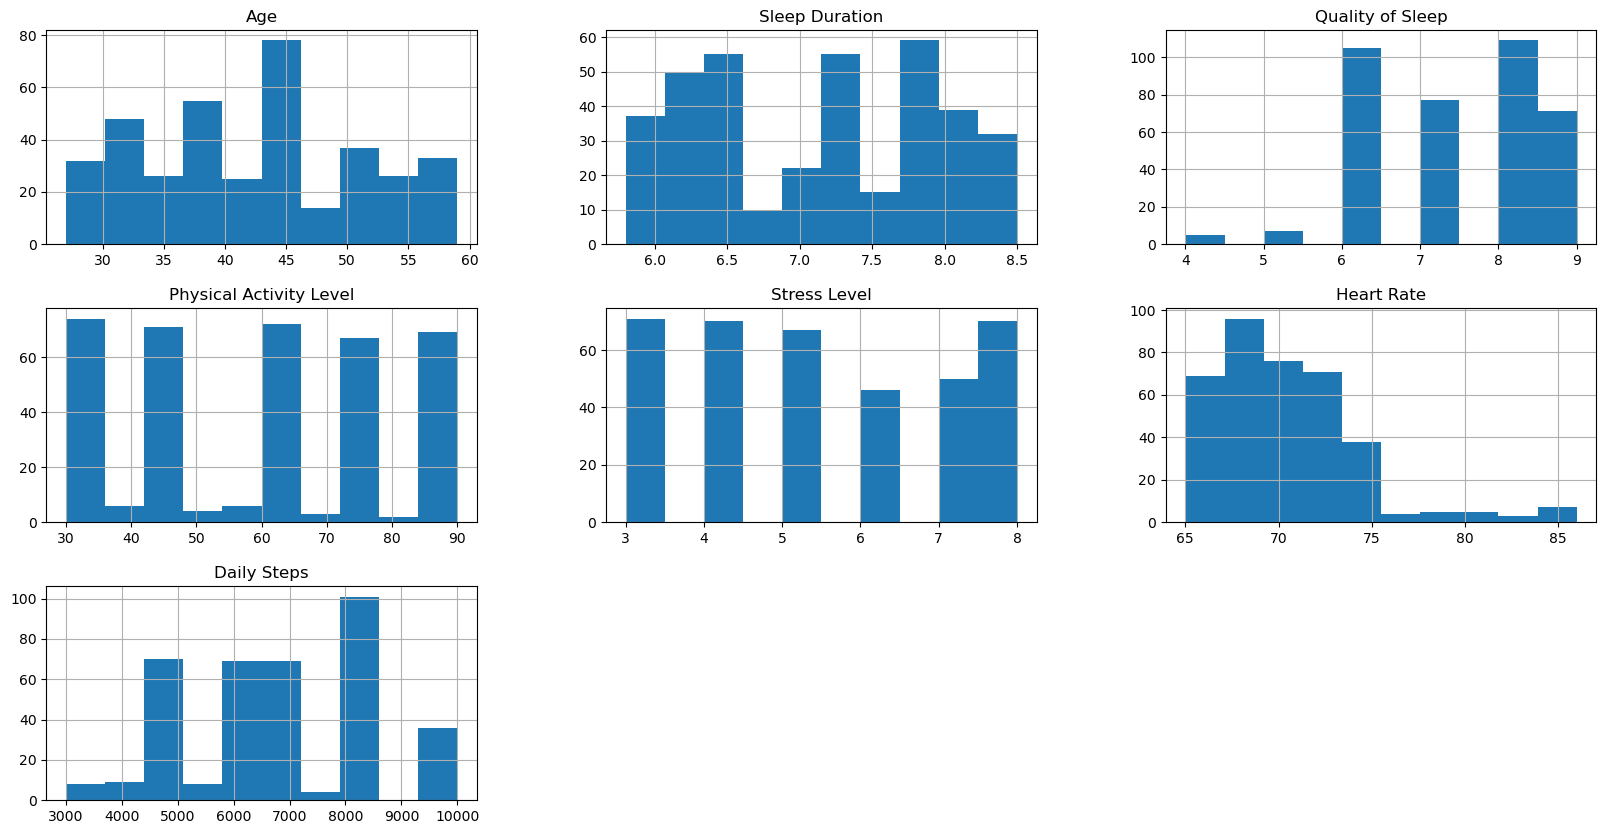

In [13]:
# TODO: In ra biểu đồ cột phân bố dữ liệu Numeric dựa vào 'numeric_col_profile'

numeric_columns.hist(bins=10, figsize=(20,10))
plt.show()

*Nhận xét về sự phân bố dữ liệu của các cột Numeric:*
1. **Age (Độ Tuổi):**
   - Độ tuổi của người được khảo sát nằm trong khoảng 27-59.
   - Phần lớn người có độ tuổi ở mức trung bình (50% ở khoảng 43 tuổi), với người đông nhất ở tuổi 45.
   - Tuổi tăng dần từ 27 đến 59.

2. **Sleep Duration (Thời Gian Ngủ):**
   - Thời gian ngủ trung bình của người được khảo sát là 7.2 giờ.
   - Người có thời gian ngủ ít nhất là 5.8 giờ và nhiều nhất là 8.5 giờ.

3. **Quality of Sleep (Chất lượng Ngủ):**
   - Chất lượng ngủ trung bình là 7.0 điểm trên thang điểm từ 1 đến 9.
   - Người có chất lượng ngủ thấp nhất là 4.0 và cao nhất là 9.0.

4. **Physical Activity Level (Mức Độ Hoạt Động Thể Chất):**
   - Mức độ hoạt động thể chất trung bình là 60.0.
   - Người có mức độ hoạt động thấp nhất là 30.0 và cao nhất là 90.0.

5. **Stress Level (Mức Độ Stress):**
   - Mức độ stress trung bình là 5.0.
   - Người có mức độ stress thấp nhất là 3.0 và cao nhất là 8.0.

6. **Heart Rate (Nhịp Tim):**
   - Nhịp tim trung bình là 70.0 bpm.
   - Người có nhịp tim thấp nhất là 65.0 bpm và cao nhất là 86.0 bpm.

7. **Daily Steps (Bước Chân Hằng Ngày):**
   - Số bước chân trung bình là 7000 bước/ngày.
   - Người có số bước chân ít nhất là 3000 và nhiều nhất là 10000 bước/ngày.

Những thông tin trên cung cấp cái nhìn tổng quan về các chỉ số quan trọng liên quan đến sức khỏe và lối sống của người được khảo sát.

#### 4.6.2. Dữ liệu Categorical

- Bảng phân bố dữ liệu Categorical:

In [14]:
# TODO: Tính các giá trị unique của mỗi cột, và 1 dictionary ứng với mỗi cột có key là giá trị unique, value là số lượng của nó trong cột
# Lưu vào 'single_cate_profile' là 1 dataframe có index là số lượng unique của cột và dictionary tương ứng
# có col là các cột của df
categoricals = df[['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']]
distribution = categoricals.agg(lambda column: column.value_counts().to_dict())
single_cate_profile = pd.DataFrame([categoricals.describe().iloc[1], distribution], index=["num_diff_vals", "distribution"])

single_cate_profile

,Gender,Occupation,BMI Category,Sleep Disorder
num_diff_vals,2,11,4,3
distribution,"{'Male': 189, 'Female': 185}","{'Nurse': 73, 'Doctor': 71, 'Engineer': 63, 'L...","{'Normal': 195, 'Overweight': 148, 'Normal Wei...","{'No': 219, 'Sleep Apnea': 78, 'Insomnia': 77}"


- Biểu đồ phân bố dữ liệu Categorical:

array([[<Axes: ylabel='Gender'>, <Axes: ylabel='Occupation'>],
       [<Axes: ylabel='BMI Category'>, <Axes: ylabel='Sleep Disorder'>]],
      dtype=object)

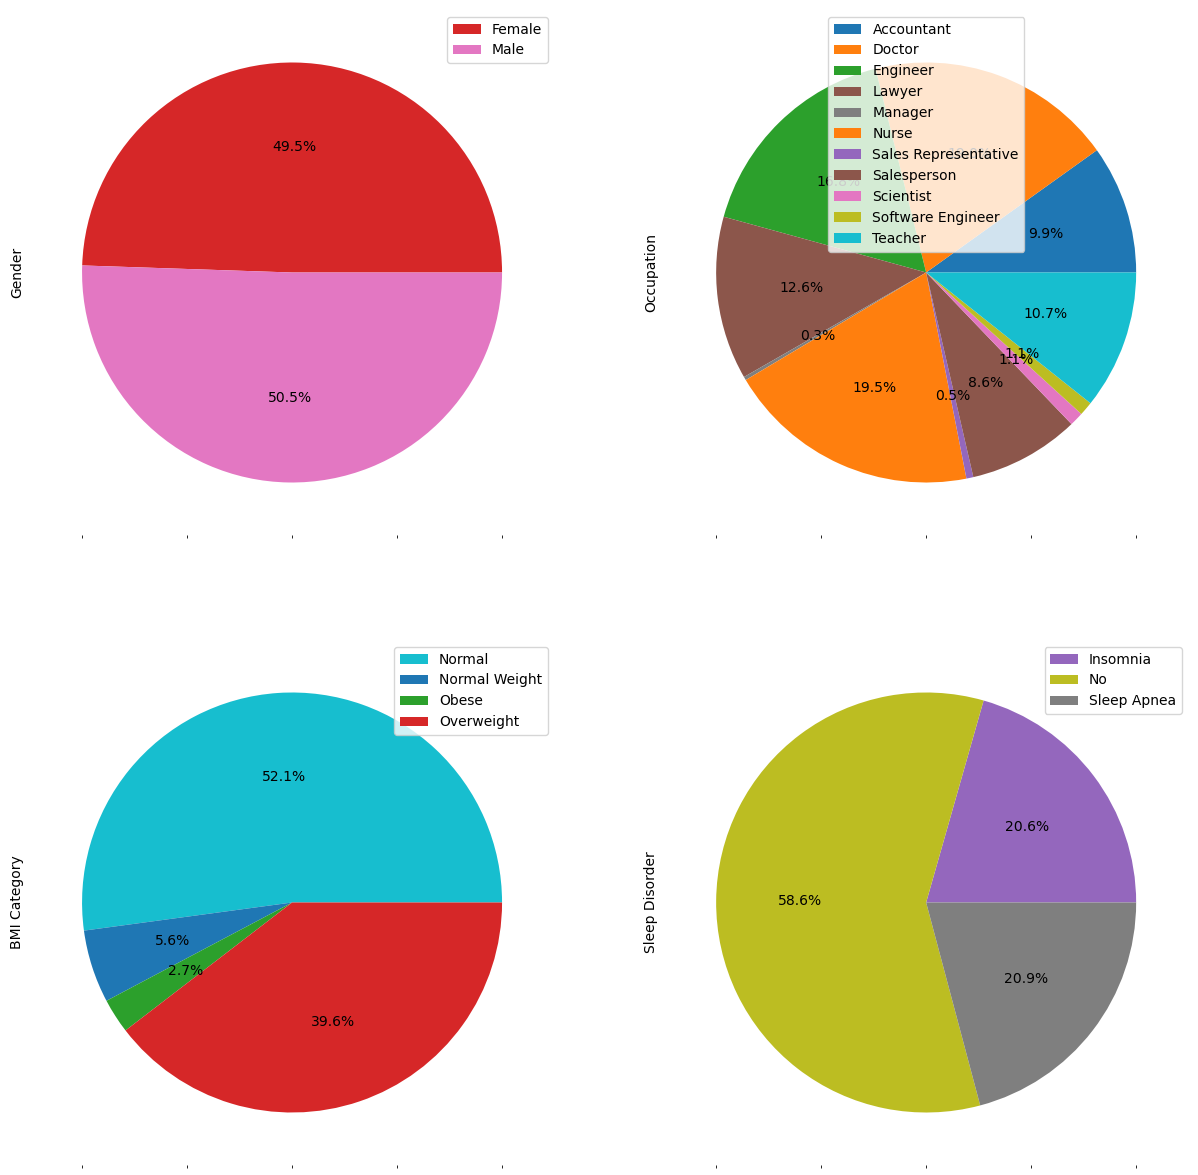

In [15]:
# TODO: In ra biểu đồ hình tròn (pie chart) phân bố dữ liệu Categorical dựa vào 'single_cate_profile'
# Ghi rõ chú thích cho từng biểu đồ.
counts = categoricals.agg(lambda column: column.value_counts()).fillna(0)
counts.plot.pie(subplots=True, layout=(2, 2), figsize=(15, 15), labeldistance=None, autopct=lambda p: '{:.1f}%'.format(round(p, 1)) if p > 0 else '')

- **Nhận xét về các cột Categorical**:
    - `Gender`: Tỷ lệ nam nữ là ngang nhau, cho thấy bộ dữ liệu mang tính cân bằng về giới tính.
    - `Occupation`: Những người tham gia khảo sát có ngành nghề đa dạng, nhưng trong đó `Doctor` và `Nurse` chiếm phần lớn (tổng hơn 40%). Có thể thấy có rất nhiều nhân viên bệnh viện tham gia vào cuộc khảo sát. Điều này có thể giúp ích cho việc tìm ra phương pháp có giấc ngủ tốt chuẩn nhất (Nhóm em tin rằng bác sĩ và y tá là những người chú trọng giữ sức khoẻ của bản thân, bao gồm chất lượng giấc ngủ).
    - `BMI Category`: Chiếm đa số là `Normal`, theo sau là `Overweight`, tỷ lệ giữa người bình thường và người nặng cân, béo phì không quá chênh lệch. Bộ dữ liệu thiếu vắng phân loại `Underweight`(nhẹ cân) là một khuyết điểm lớn vì chúng ta không thể biết liệu nhóm người gầy có ngủ ngon hơn nhóm người béo hay không.
    - `Sleep Disorder`: Sự chênh lệch giữa người không bị và bị rối loạn giấc ngủ (bao gồm `Insomnia` và `Sleep Apnea`) là không quá lớn, bộ dữ liệu mang tính cân bằng về chất lượng giấc ngủ.
- Một thắc mắc về cột `BMI Category` là giá trị `Normal` và `Normal Weight` khác nhau ở chỗ nào?
    - Tác giả của bộ dữ liệu không hề đề cập đến vấn đề này trên Kaggle, một số tài khoản đã hỏi nhưng không có được câu trả lời.
    - Theo nhóm em tìm hiểu về bảng phân loại BMI thì 2 giá trị này là như nhau, vậy nên nhóm em quyết định sẽ hợp nhất 2 giá trị thành `Normal`.

In [16]:
# TODO: Hợp nhất 2 giá trị 'Normal' và 'Normal Weight' thành 'Normal' trong cột 'BMI Category'
df['BMI Category'].replace(['Normal Weight'], 'Normal', inplace=True)
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

---
## 5. Đặt câu hỏi có ý nghĩa

### 5.1. Câu hỏi 1: Lối sống lý tưởng để có một giấc ngủ ngon là gì?

- Thành viên phụ trách: Nguyễn Trọng Đại
- Mục đích: Đưa ra mẫu hình lý tưởng về lối sống để từ đó mỗi người có thể tự điều chỉnh bản thân, giúp bản thân có một giấc ngủ ngon.
- Ý tưởng thực hiện: Phân tích các đặc trưng liên quan đến lối sống, tìm ra giá trị phù hợp ở mỗi đặc trưng (giá trị có tần suất rối loạn giấc ngủ là ít nhất), kết hợp các giá trị để đưa ra mẫu hình lý tưởng. Gộp nhóm các giá trị theo giới tính vì sinh học của nam và nữ là khác nhau, cần có hình mẫu riêng.

#### 5.1.1. Tiền xử lý

- Các bước tiền xử lý:
    - Bước 1: Lọc ra các cột liên quan đến lối sống, bao gồm: `Sleep Duration`, `Quality of Sleep`, `Physical Activity Level`, `Stress Leve`, `BMI Category` và `Daily Steps`.
    - Bước 2: Loại bỏ các dòng mắc chứng rối loạn giấc ngủ.

In [17]:
# TODO: Code tiền xử lý câu hỏi 1

# Bước 1
good_lifestyle_df = df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Daily Steps']]

# Bước 2
good_lifestyle_df = good_lifestyle_df[df['Sleep Disorder'] == 'No']
good_lifestyle_df

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps
0,6.1,6,42,6,Overweight,4200
1,6.2,6,60,8,Normal,10000
2,6.2,6,60,8,Normal,10000
7,7.8,7,75,6,Normal,8000
8,7.8,7,75,6,Normal,8000
...,...,...,...,...,...,...
341,8.2,9,90,3,Normal,10000
342,8.2,9,90,3,Normal,10000
343,8.1,9,75,3,Overweight,7000
358,8.0,9,75,3,Overweight,7000


#### 5.1.2. Phân tích dữ liệu trả lời câu hỏi

- Các bước phân tích dữ liệu:
    - Bước 1: Tính số lần xuất hiện cho từng giá trị của mỗi cột, gộp nhóm theo giới tính.
    - Bước 2: Trực quan hoá bước 1. Mỗi biểu đồ chia thành 2 màu phân biệt nam nữ.
        - Đối với dữ liệu dạng numerical, in ra biểu đồ scatter.
        - Đối với dữ liệu dạng categorical, in ra biểu đồ cột.
    - Bước 3: Chọn các giá trị tốt nhất (số lần xuất hiện nhiều nhất) của từng cột, đưa ra mẫu hình lối sống lý tưởng cho từng giới tính.

In [18]:
# TODO: Code phân tích dữ liệu để trả lời câu hỏi 1

# Bước 1
def count_by_gender(col: pd.Series):
    counts = col.groupby(df['Gender']).value_counts()
    
    single_index_counts = pd.Series(name=col.name)
    single_index_counts['Male'] = counts['Male'].to_dict()
    single_index_counts['Female'] = counts['Female'].to_dict()
    
    return single_index_counts
    
counts_df = good_lifestyle_df.agg(count_by_gender)
print('Bảng số lần xuất hiện của 1 giá trị chia theo giới tính')
counts_df

Bảng số lần xuất hiện của 1 giá trị chia theo giới tính


,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps
Male,"{7.8: 25, 7.7: 23, 6.0: 16, 7.2: 13, 7.3: 12, ...","{8: 67, 6: 35, 7: 35}","{60: 33, 75: 32, 30: 29, 90: 29, 45: 4, 70: 3,...","{5: 56, 6: 36, 8: 31, 4: 9, 7: 3, 3: 2}","{'Normal': 129, 'Overweight': 8}","{8000: 92, 5000: 30, 6000: 4, 7000: 3, 6800: 2..."
Female,"{7.2: 20, 8.4: 14, 7.1: 13, 8.5: 13, 8.3: 4, 8...","{9: 38, 8: 34, 6: 5, 7: 5}","{30: 31, 60: 31, 75: 4, 90: 4, 55: 4, 50: 3, 8...","{3: 38, 4: 34, 6: 7, 8: 2, 5: 1}","{'Normal': 71, 'Overweight': 11}","{7000: 33, 5000: 31, 10000: 4, 5500: 4, 6000: ..."


Text(0.5, 0.98, 'Biểu đồ số lần xuất hiện của một giá trị theo giới tính')

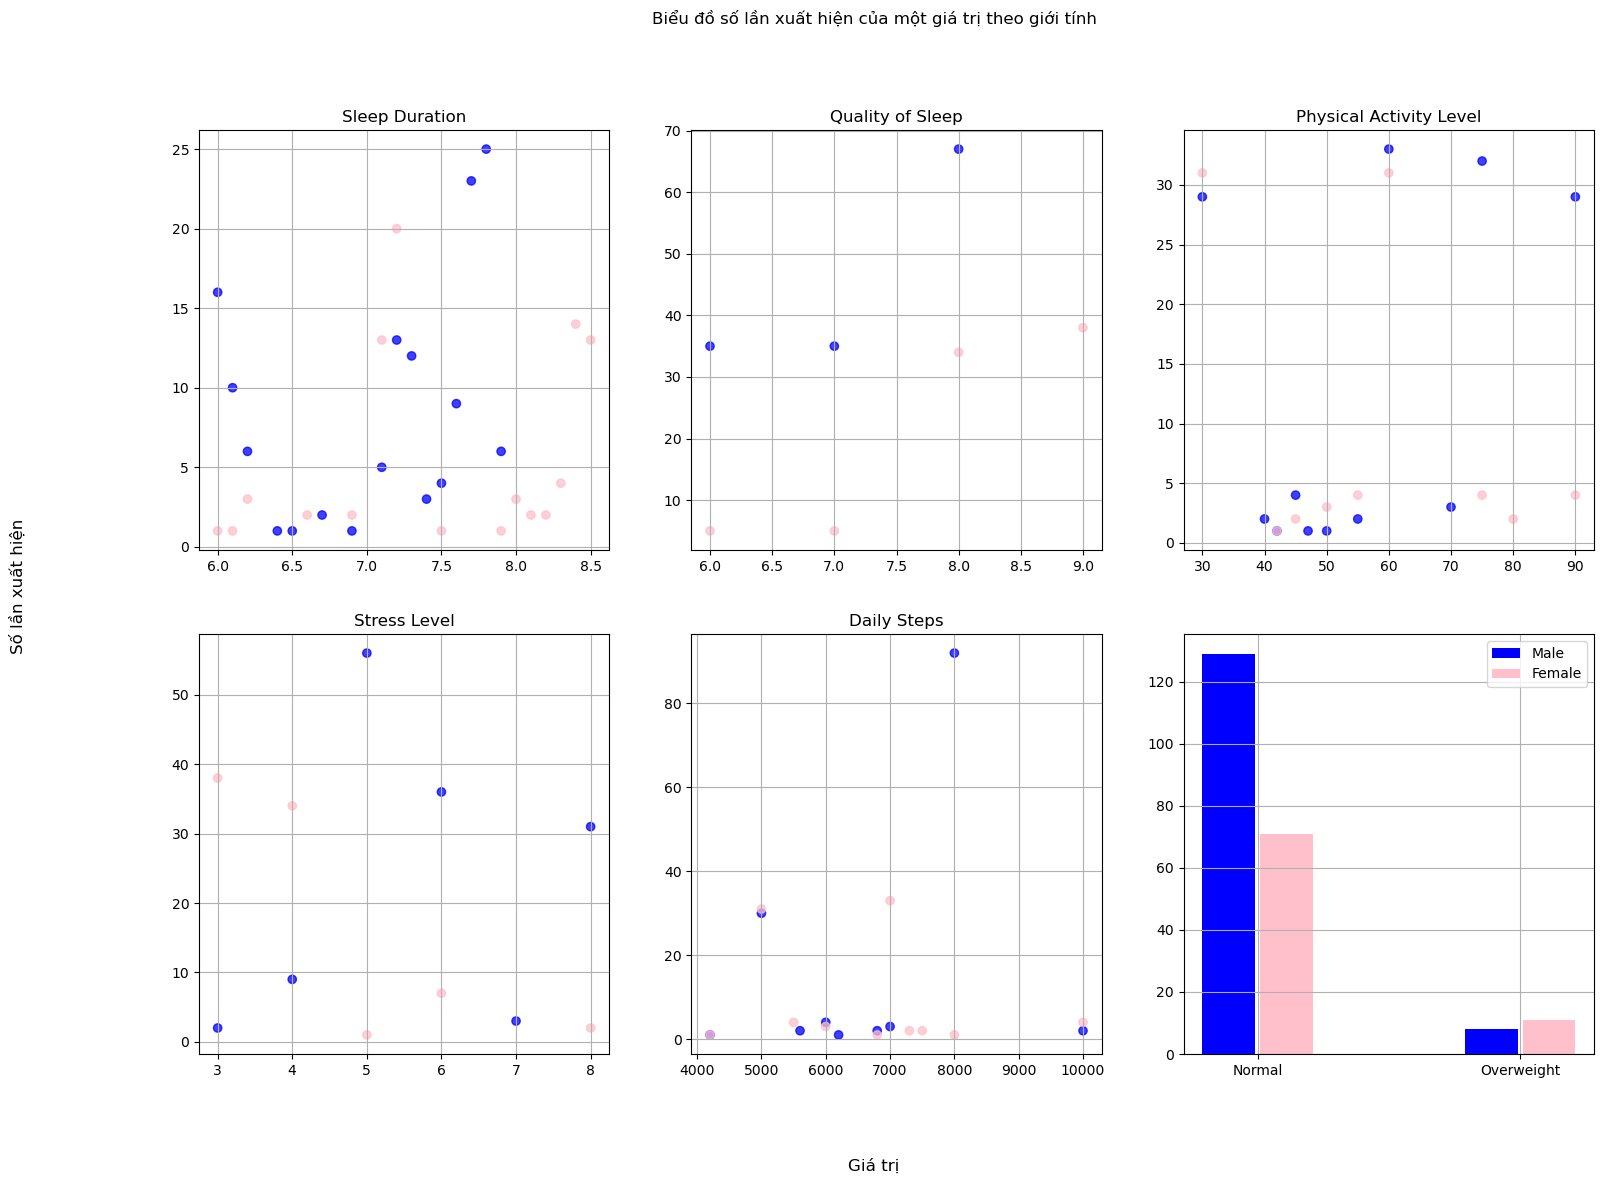

In [19]:
# Bước 2
fig = plt.figure(figsize=(18, 12))

columns = good_lifestyle_df.columns.drop('BMI Category')

# Numerical
for i, col in zip(range(len(columns)), columns):
    # Tạo subplot
    ax = fig.add_subplot(2, 3, i + 1)
    
    # Tạo Series từ Dictionary cho từng giới tính
    male = pd.Series(counts_df[col]['Male'])
    female = pd.Series(counts_df[col]['Female'])
    
    # Tạo mảng index cho nam (nữ có thể tự suy ra)
    male_index = np.arange(len(male.index))
    
    # Gộp Series để làm Scatter
    count = pd.concat([male, female])
    
    # Map màu theo index
    colors = np.full((len(count.index)), 'pink')
    colors[male_index] = 'blue'
    
    # Tạo biểu đồ Scatter
    sc = ax.scatter(count.index, count.values, c=colors, alpha=0.75)
    ax.set_title(col)
    ax.grid()
    
# Categorical
ax = fig.add_subplot(2, 3, 6)
    # Tạo Series cho từng giới tính
male = pd.Series(counts_df['BMI Category']['Male'], name='Male')
female = pd.Series(counts_df['BMI Category']['Female'], name='Female')
    # Tạo biểu đồ cột
x_axis = np.arange(2)
males_ax = ax.bar(x_axis - 0.11, male, width=0.2, label='Male', align='center', color='blue')
females_ax = ax.bar(x_axis + 0.11, female, width=0.2, label='Female', align='center', color='pink')
    # Cài đặt axis
ax.set_xticks(x_axis, ['Normal', 'Overweight'])
ax.set_label('BMI Category')
ax.legend()
ax.grid()

# Cài đặt figure
fig.supxlabel('Giá trị')
fig.supylabel('Số lần xuất hiện')
fig.suptitle('Biểu đồ số lần xuất hiện của một giá trị theo giới tính')

- Dựa vào biểu đồ trực quan ở trên có thể thấy các điểm lý tưởng là các điểm nằm ở vị trí cao nhất trong từng biểu đồ, ứng với từng màu theo giới tính.

In [20]:
# Bước 3

def choose_best(col: pd.Series):
    male = list(col['Male'].keys())[0]
    female = list(col['Female'].keys())[0]
    return pd.Series([male, female], index=col.index)

print('Mẫu hình lối sống lý tưởng của từng giới tính')
counts_df.agg(choose_best)

Mẫu hình lối sống lý tưởng của từng giới tính


,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps
Male,7.8,8,60,5,Normal,8000
Female,7.2,9,30,3,Normal,7000


- Có thể thấy mẫu hình lối sống lý tưởng của nam và nữ không mấy khác biệt. Điểm khác biệt lớn nhất là `Physical Activity Level` cho thấy nam cần hoạt động nhiều gấp đôi nữ để có một giấc ngủ ngon.
- Nếu các bạn có thắc mắc là tại sao mẫu hình lý tưởng của nam mà có `Stress Level` là 5 chứ không phải 3 hoặc thấp hơn, thì là do mình chọn các giá trị có số lần xuất hiện nhiều nhất (trong Dataframe `good_lifestyle_df`). Mình dùng count chứ không phải mean vì mean nó chỉ cho mình cái ngưỡng trung bình thôi, mình muốn cái mẫu hình của mình nó chính xác hơn, số lượng người ngủ ngon nhiều hơn thì mẫu hình càng chính xác đúng không nhỉ :V

### 5.2. Câu hỏi 2: Liệu nam giới hay nữ giới bị rối loạn giấc ngủ nhiều hơn và tại sao?

- Thành viên phụ trách: Nguyễn Trọng Đại
- Mục đích: Giúp chúng ta có cái nhìn tổng quát về sự ảnh hưởng của giới tính đối với chứng rối loạn giấc ngủ cũng như tác nhân gây ra nó.
- Ý tưởng thực hiện: Phân tích tỷ lệ bị rối loạn giấc ngủ giữa nam và nữ, sau đó phân tích sự ảnh hưởng (mối quan hệ) của các đặc trưng khác theo từng giới tính.

#### 5.2.1. Tiền xử lý

- Các bước tiền xử lý:
    - Bước 1: Loại bỏ cột `Occupation`, vì nó không liên quan gì đến giới tính, và sẽ rất vô nghĩa nếu dùng nó để xét xem nam và nữ ai mất ngủ nhiều hơn. Đâu ai bắt nam phải làm nghề này, nữ phải làm nghề nọ đâu :)
    - Bước 2: Gộp các chứng rối loạn giấc ngủ thành `Yes` để thuận tiện cho việc xử lý.

In [21]:
# TODO: Code tiền xử lý câu hỏi 2

# Bước 1
columns = df.columns.drop('Occupation')
q2_df = df[columns]

# Bước 2
disorder_filter = q2_df['Sleep Disorder'] != 'No'
q2_df['Sleep Disorder'][disorder_filter] = 'Yes'
q2_df

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,6.1,6,42,6,Overweight,77,4200,No,126,83
1,Male,28,6.2,6,60,8,Normal,75,10000,No,125,80
2,Male,28,6.2,6,60,8,Normal,75,10000,No,125,80
3,Male,28,5.9,4,30,8,Obese,85,3000,Yes,140,90
4,Male,28,5.9,4,30,8,Obese,85,3000,Yes,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,8.1,9,75,3,Overweight,68,7000,Yes,140,95
370,Female,59,8.0,9,75,3,Overweight,68,7000,Yes,140,95
371,Female,59,8.1,9,75,3,Overweight,68,7000,Yes,140,95
372,Female,59,8.1,9,75,3,Overweight,68,7000,Yes,140,95


#### 5.2.2. Phân tích dữ liệu trả lời câu hỏi

- Các bước phân tích dữ liệu:
    - Bước 1: Tính số lượng bị và không bị rối loạn giấc ngủ, đưa ra tỷ lệ phần trăm cho từng giới tính.
    - Bước 2: Với mỗi cột, thể hiện mối liên hệ giữa nó, `Gender` và `Sleep Disorder` bằng biểu đồ.
    - Bước 3: Đưa ra nhận xét cho mỗi biểu đồ. Rút ra kết luận tại sao nam hoặc nữ lại bị rối loạn giấc ngủ nhiều hơn.

In [22]:
# TODO: Code phân tích dữ liệu để trả lời câu hỏi 2

# Bước 1
    # Tính số lượng bị và không bị rối loạn giấc ngủ cho từng giới tính
counts = q2_df['Sleep Disorder'].groupby(q2_df['Gender']).value_counts()
counts_df = pd.DataFrame(counts).reset_index()
counts_df = counts_df.pivot(index='Gender', columns='Sleep Disorder', values='count')
    # Tính tỷ lệ % bị rối loạn giấc ngủ
counts_df['% Yes'] = round(counts_df['Yes'] * 100 / (counts_df['No'] + counts_df['Yes']), 2)
counts_df

Sleep Disorder,No,Yes,% Yes
Gender,,,
Female,82,103,55.68
Male,137,52,27.51


- Có thể thấy nữ giới mắc chứng rối loạn giấc ngủ nhiều gấp đôi so với nam giới. Cứ mỗi 2 người phụ nữ thì có một người bị rối loạn giấc ngủ. Vì vậy cánh đàn ông chúng ta phải biết yêu thương phụ nữ nhiều hơn :)

In [23]:
# Bước 2


### 5.3. Câu hỏi 3: ...

- Thành viên phụ trách: ...
- Mục đích: ...

#### 5.3.1. Tiền xử lý

- Các bước tiền xử lý:
    - ...

In [24]:
# TODO: Code tiền xử lý câu hỏi 3


#### 5.3.2. Phân tích dữ liệu trả lời câu hỏi

- Các bước phân tích dữ liệu:
    - ...

In [25]:
# TODO: Code phân tích dữ liệu để trả lời câu hỏi 3


### 5.4. Câu hỏi 4: ...

- Thành viên phụ trách: ...
- Mục đích: ...

#### 5.4.1. Tiền xử lý

- Các bước tiền xử lý:
    - ...

In [26]:
# TODO: Code tiền xử lý câu hỏi 4


#### 5.4.2. Phân tích dữ liệu trả lời câu hỏi

- Các bước phân tích dữ liệu:
    - ...

In [27]:
# TODO: Code phân tích dữ liệu để trả lời câu hỏi 4


---
## 6. Phản ánh bản thân sau khi hoàn thành đồ án

### 6.1. Những khó khăn gặp phải?

- Nguyễn Trọng Đại:
    - ...
- Nguyễn Tấn Khiêm:
    - ...
    
### 6.2. Kinh nghiệm, bài học đạt được khi làm đồ án?

- Nguyễn Trọng Đại:
    - ...
- Nguyễn Tấn Khiêm:
    - ...
    
### 6.3. Nếu có thêm thời gian, nhóm sẽ làm:

- ...

---
## 7. Tài liệu sử dụng

- ...